In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [46]:
data=pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [47]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [48]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1
1999,2,81,72,15,76,30.1,0.547,25,0


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [29]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [30]:
data.shape

(2000, 9)

In [31]:
data.size

18000

In [32]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


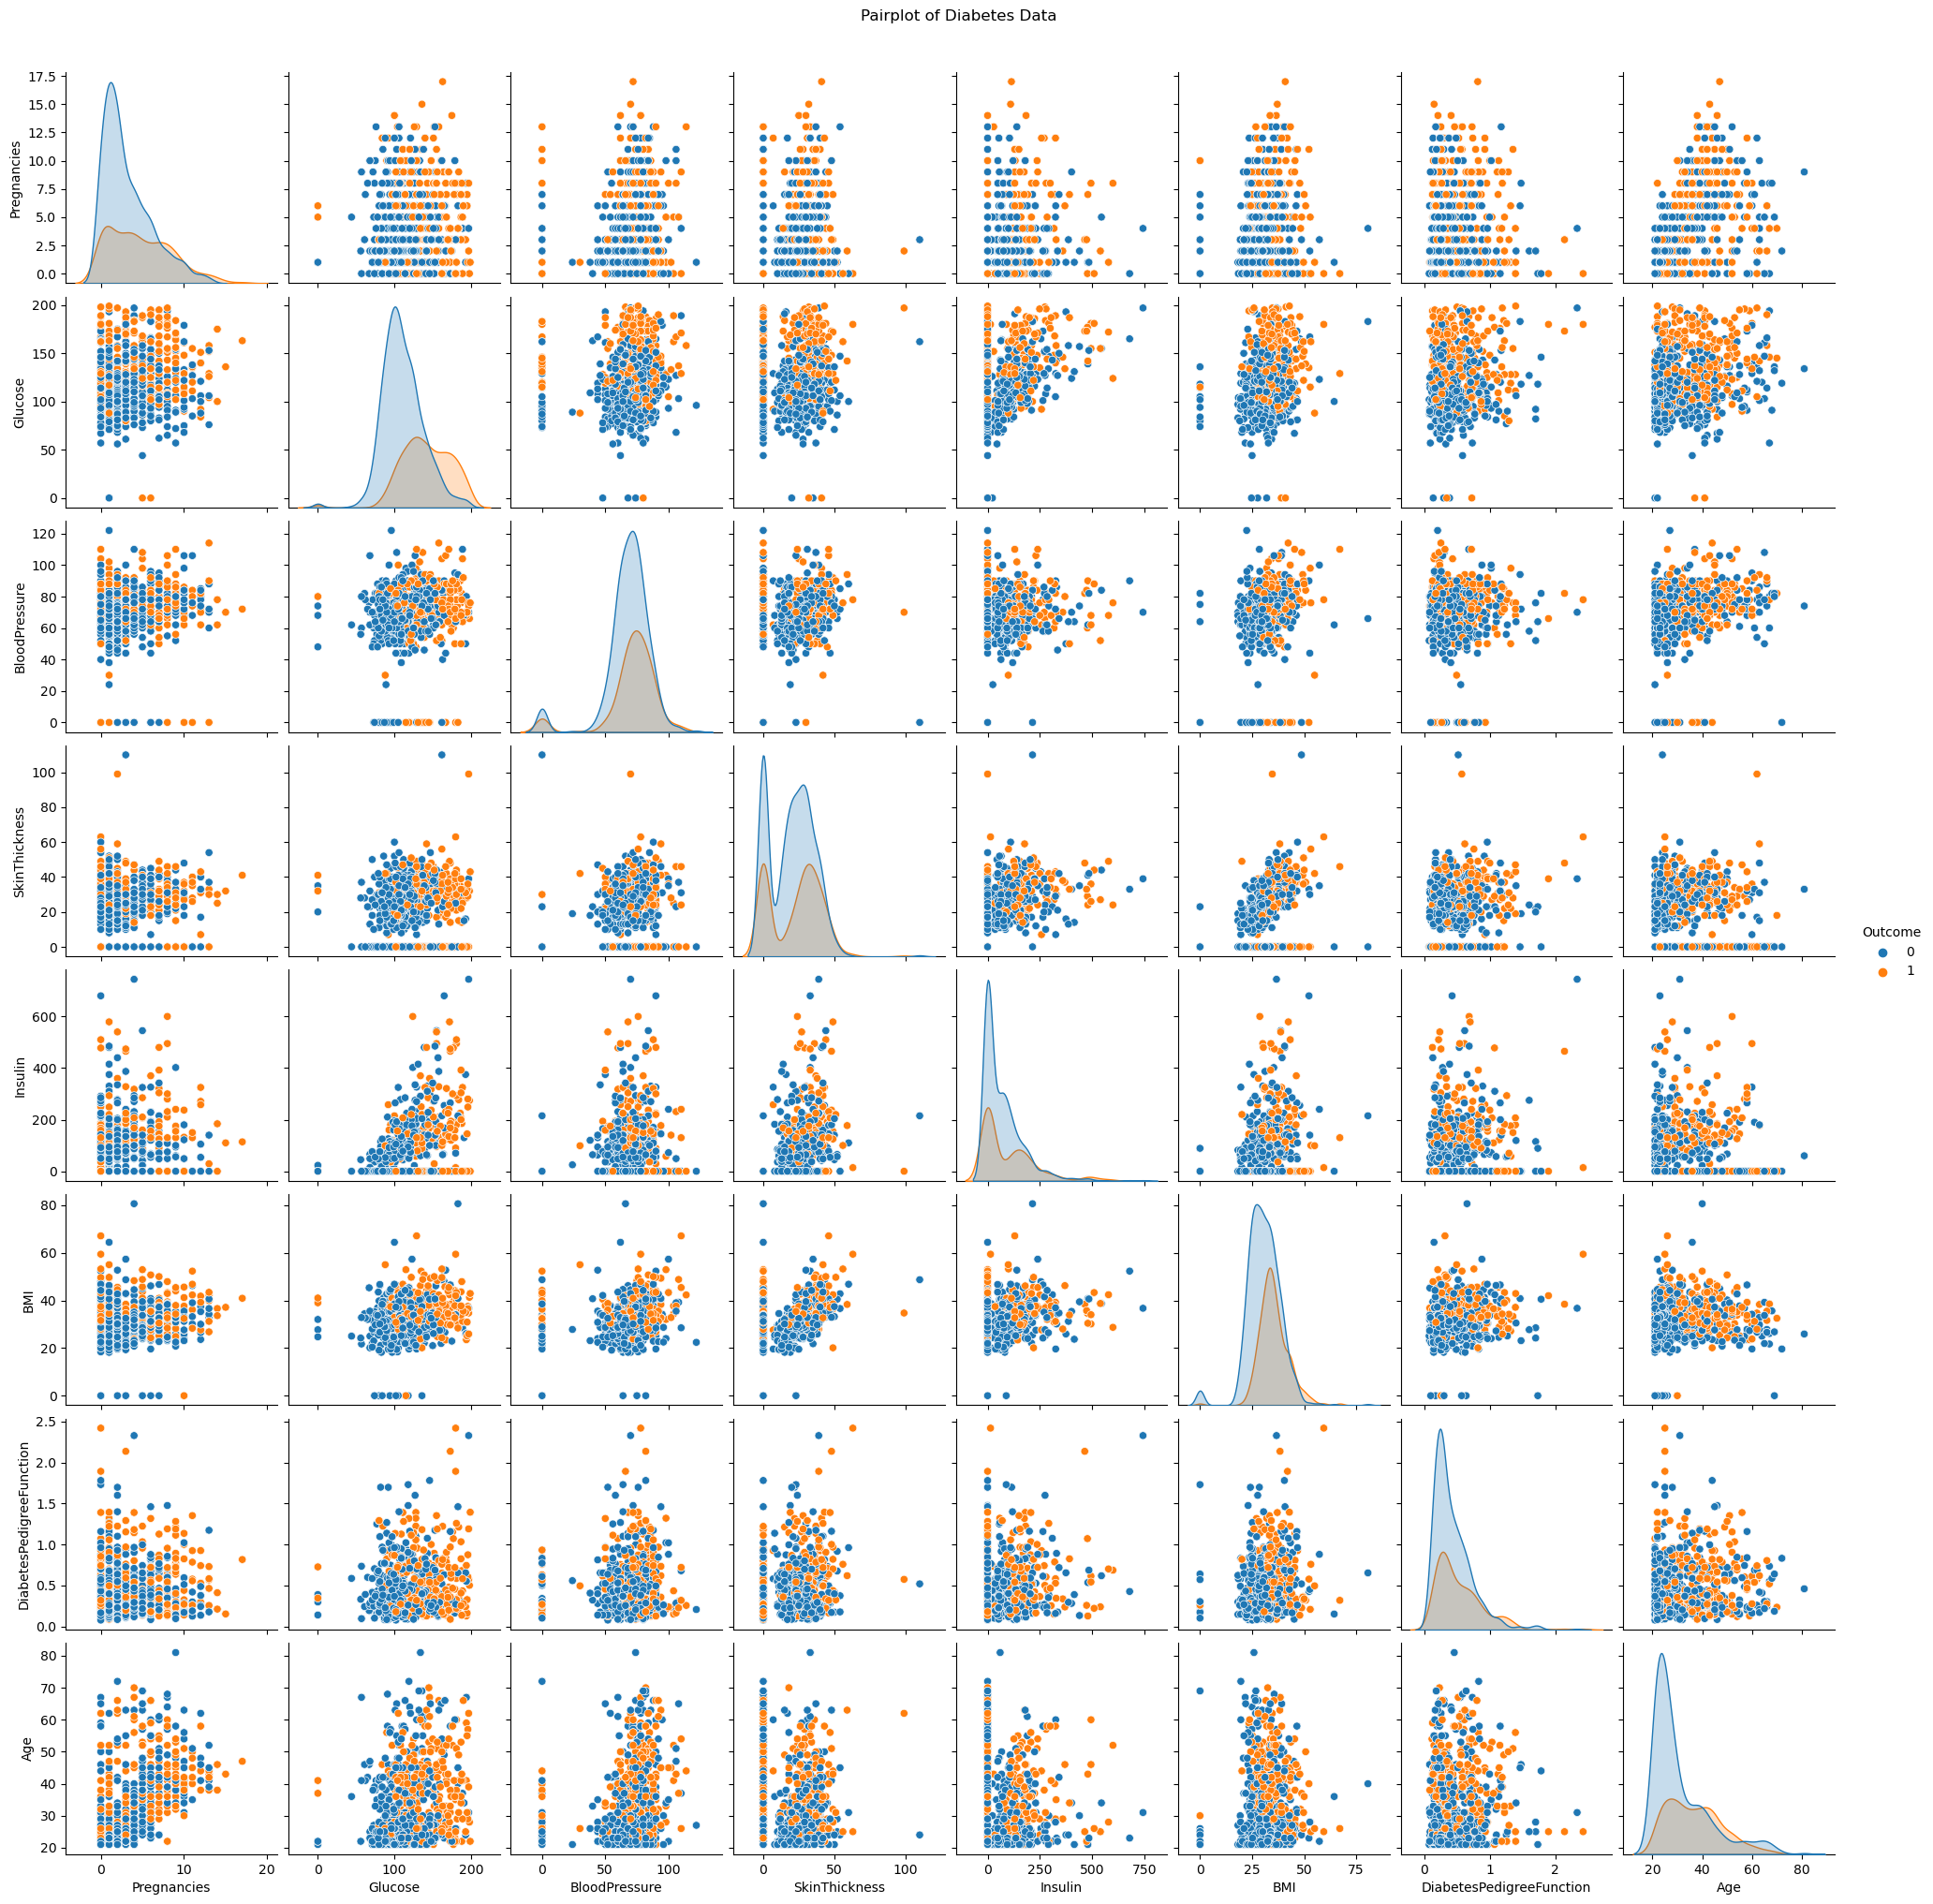

In [33]:
# Pairplot
sns.pairplot(data, hue='Outcome')
plt.suptitle('Pairplot of Diabetes Data', y=1.02)
plt.show()

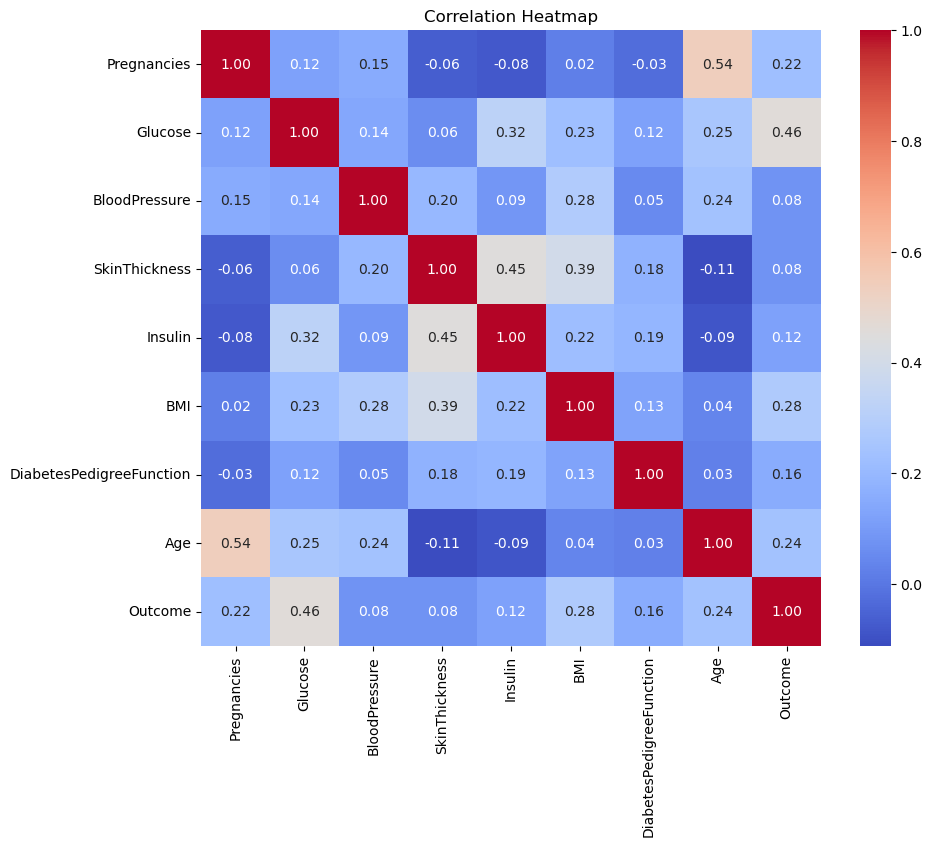

In [34]:
# Correlation Heatmap
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

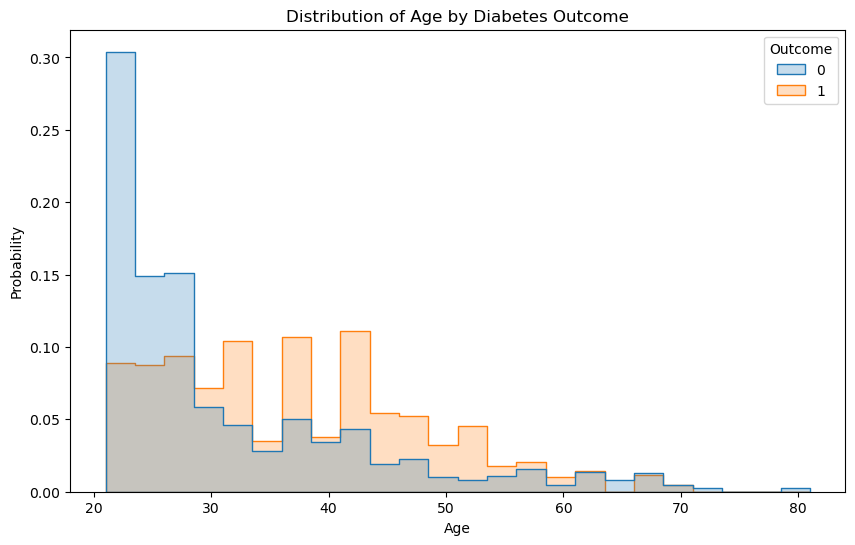

In [35]:
# Distribution of Age by Outcome
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', data=data, hue='Outcome', element='step', stat='probability', common_norm=False)
plt.title('Distribution of Age by Diabetes Outcome')
plt.xlabel('Age')
plt.show()

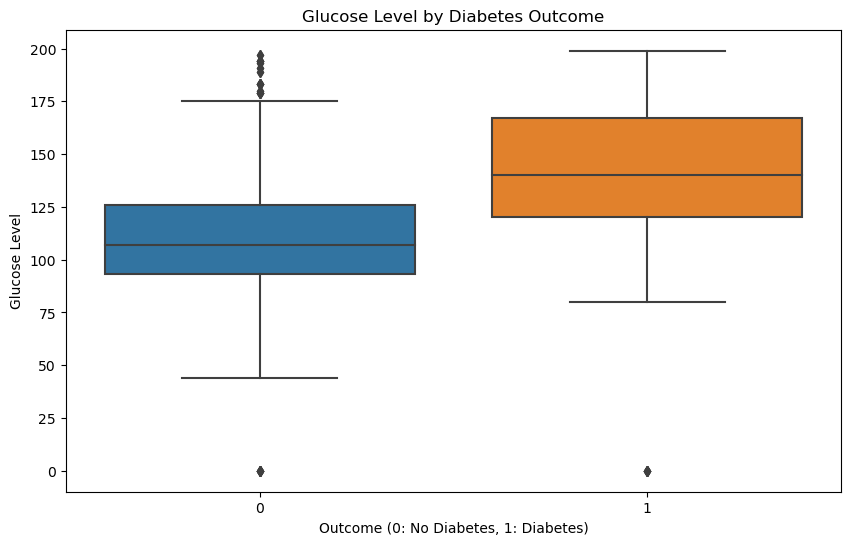

In [36]:
# Boxplot of Glucose by Outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Glucose', data=data)
plt.title('Glucose Level by Diabetes Outcome')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Glucose Level')
plt.show()

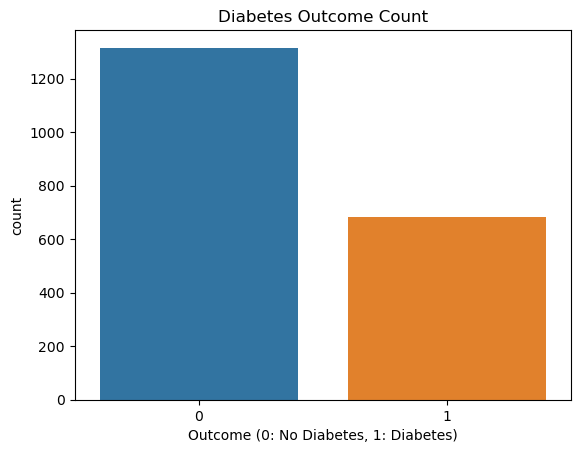

In [37]:
# Countplot of Outcome
sns.countplot(x='Outcome', data=data)
plt.title('Diabetes Outcome Count')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.show()

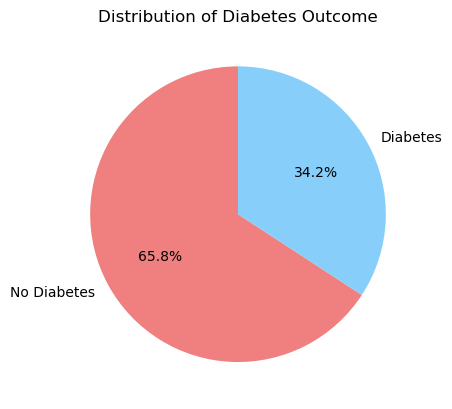

In [38]:
outcome_counts = data['Outcome'].value_counts()
labels = ['No Diabetes', 'Diabetes']
colors = ['lightcoral', 'lightskyblue']
plt.pie(outcome_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Diabetes Outcome')
plt.show()


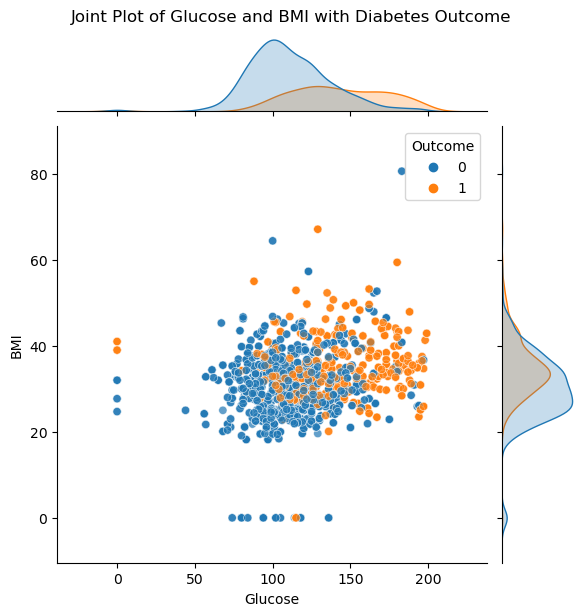

In [39]:
sns.jointplot(x='Glucose', y='BMI', data=data, kind='scatter', hue='Outcome', marker='o', alpha=0.7)
plt.suptitle('Joint Plot of Glucose and BMI with Diabetes Outcome', y=1.02)
plt.show()

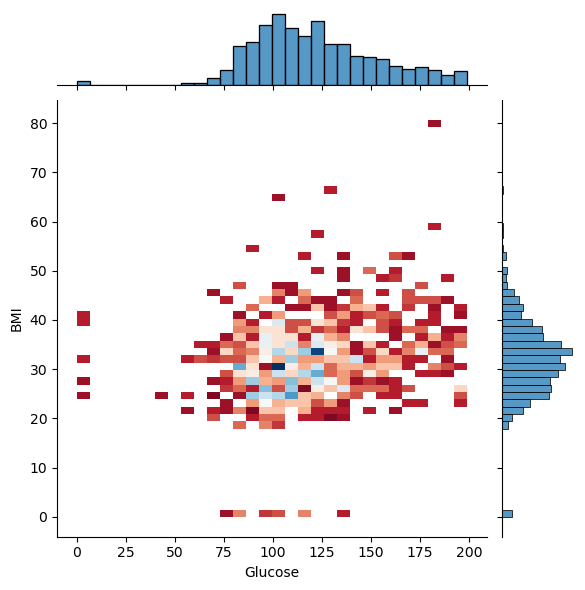

In [40]:
sns.jointplot(x='Glucose', y='BMI', data=data, kind='hist', cmap='RdBu')

In [42]:
# Step 1: Data Preprocessing
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [43]:
# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Step 3: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
# Step 4: Model Selection and Training
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [52]:
# Step 5: Model Evaluation
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [53]:
# Step 6: Display Results
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.79
Confusion Matrix:
[[232  21]
 [ 63  84]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       253
           1       0.80      0.57      0.67       147

    accuracy                           0.79       400
   macro avg       0.79      0.74      0.76       400
weighted avg       0.79      0.79      0.78       400



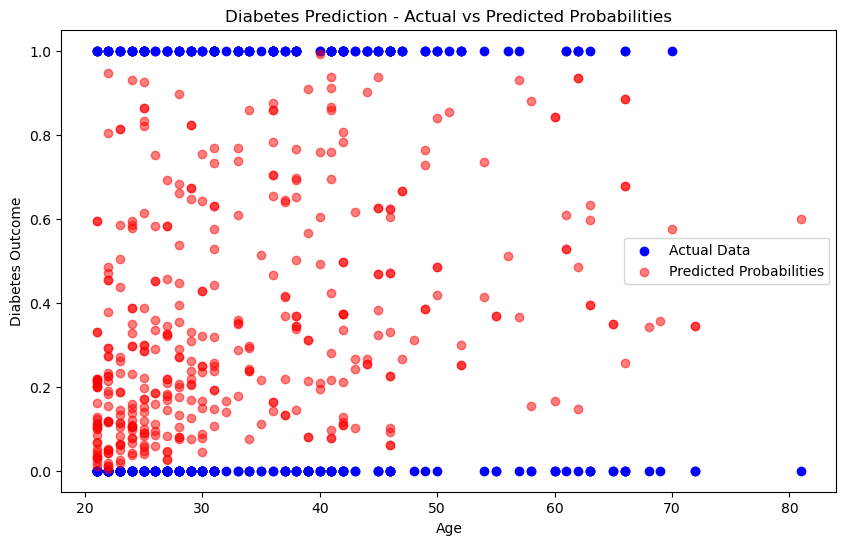

In [58]:
# Data Preprocessing
X = data.drop('Outcome', axis=1)
y = data['Outcome']
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Model Training
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
# Predict probabilities on the test set
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
# Plot Scatter Plot with Probabilities
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Age'], y_test, color='blue', label='Actual Data')
plt.scatter(X_test['Age'], y_pred_prob, color='red', label='Predicted Probabilities', alpha=0.5)
plt.title('Diabetes Prediction - Actual vs Predicted Probabilities')
plt.xlabel('Age')
plt.ylabel('Diabetes Outcome')
plt.legend()
plt.show()
